In [1]:
import pandas as pd

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt

In [18]:

if int(input('1.VS or 2.GC?'))==1:
    df=pd.read_csv('train.csv')
    testdf=pd.read_csv('test.csv')
else:
    df=pd.read_csv('/content/train.csv')
    testdf=pd.read_csv('content/test.csv')
    


In [4]:
df.head()
testdf.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y=df.label
X=df.iloc[:,1:]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [11]:
def train_model(model,params={}):
  grid=GridSearchCV(model,param_grid=params,n_jobs=-1,refit=True,cv=3,verbose=1)
  grid.fit(x_train,y_train)
  return grid

def report(model):
  print(model.get_params())
  preds=model.predict(x_test)
  print(metrics.accuracy_score(y_test,preds))
  cm=metrics.confusion_matrix(y_test,preds)
  print(cm)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
  cm_display.plot()
  plt.show()
  print(metrics.classification_report(y_test,preds))
  # metrics.RocCurveDisplay.from_predictions(
  #     y_test, preds, color='darkorange'
  # )
  # plt.legend()
  # plt.show()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'cv': 3, 'error_score': nan, 'estimator__algorithm': 'auto', 'estimator__leaf_size': 30, 'estimator__metric': 'minkowski', 'estimator__metric_params': None, 'estimator__n_jobs': None, 'estimator__n_neighbors': 5, 'estimator__p': 2, 'estimator__weights': 'uniform', 'estimator': KNeighborsClassifier(), 'n_jobs': -1, 'param_grid': {}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 1}
0.9667619047619047
[[1006    0    3    0    0    2    4    0    0    0]
 [   0 1182    5    0    0    0    1    1    1    0]
 [  11   10 1035    3    0    0    2   14    2    0]
 [   1    1    4 1035    0   10    0    8    5    6]
 [   1    9    0    0  990    0    4    2    0   28]
 [   2    1    1   10    0  899   13    0    1    3]
 [   2    1    0    0    1    3 1037    0    0    0]
 [   1   13    5    1    5    0    0 1094    0   10]
 [   4    8    1   24    5   26   10    2  906    9]
 [   4 

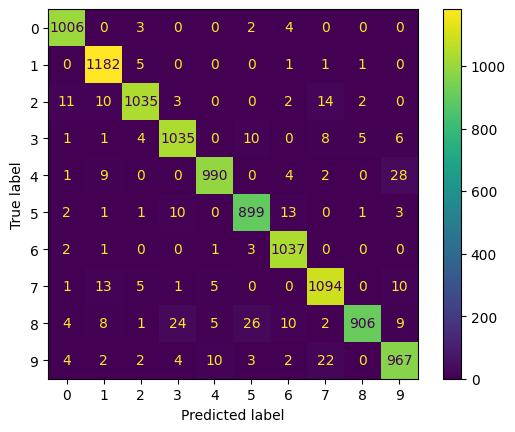

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1015
           1       0.96      0.99      0.98      1190
           2       0.98      0.96      0.97      1077
           3       0.96      0.97      0.96      1070
           4       0.98      0.96      0.97      1034
           5       0.95      0.97      0.96       930
           6       0.97      0.99      0.98      1044
           7       0.96      0.97      0.96      1129
           8       0.99      0.91      0.95       995
           9       0.95      0.95      0.95      1016

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500



In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=train_model(KNeighborsClassifier(),{}) #'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25,27,29]
report(knn)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR=train_model(LogisticRegression(penalty='l2',multi_class='multinomial',),{'solver':['newton-cg','saga','sag'],'C':[0.1,1,10]})
report(LR)